In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime

In [31]:
dataset_path = '~/Workspace/github.com/keeeeei79/playground_movielens/data/ml-1m/'

In [59]:
ratings_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(os.path.join(dataset_path, 'ratings.dat'), sep='::', engine='python', names=ratings_columns)
ratings['datetime'] = ratings['timestamp'].map(datetime.datetime.fromtimestamp)

In [33]:
users_columns = ['user_id', 'gender', 'age', 'occupation', 'zip_code']
users = pd.read_csv(os.path.join(dataset_path, 'users.dat'), sep='::', engine='python', names=users_columns)

In [34]:
movies_columns = ['movie_id', 'title', 'genres']
movies = pd.read_csv(os.path.join(dataset_path, 'movies.dat'), sep='::', engine='python', names=movies_columns)

In [60]:
ratings.head()

,user_id,movie_id,rating,timestamp,datetime
0,1,1193,5,978300760,2001-01-01 07:12:40
1,1,661,3,978302109,2001-01-01 07:35:09
2,1,914,3,978301968,2001-01-01 07:32:48
3,1,3408,4,978300275,2001-01-01 07:04:35
4,1,2355,5,978824291,2001-01-07 08:38:11


In [36]:
users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [37]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [38]:
ratings.shape, users.shape, movies.shape

((1000209, 4), (6040, 5), (3883, 3))

# EDA

In [39]:
users.groupby('gender').size()

gender
F    1709
M    4331
dtype: int64

<Axes: >

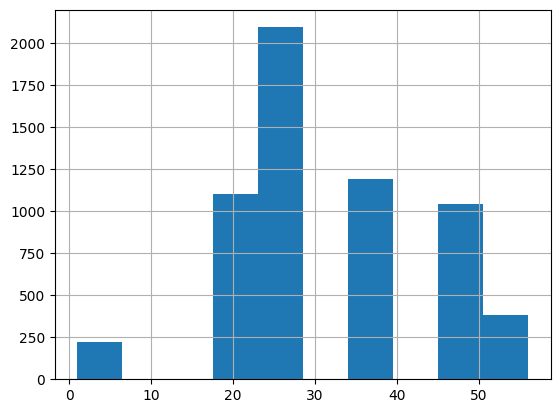

In [46]:
users['age'].hist()

<Axes: >

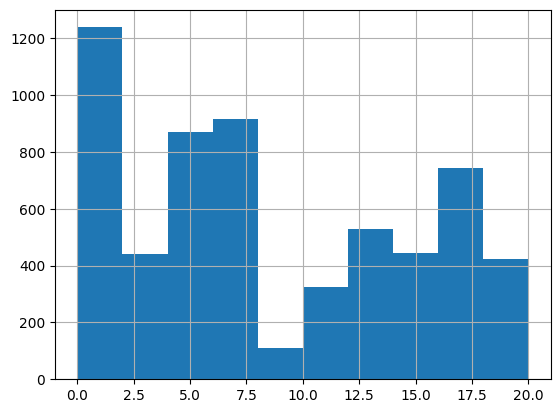

In [47]:
users['occupation'].hist()

In [52]:
users['zip_code'].value_counts().head(10)

zip_code
48104    19
22903    18
55104    17
94110    17
55455    16
55105    16
10025    16
94114    15
55408    15
02138    15
Name: count, dtype: int64

In [53]:
moveis['genres'].map(lambda x: len(x.split('|'))).value_counts()

genres
1    2025
2    1322
3     421
4     100
5      14
6       1
Name: count, dtype: int64

In [54]:
ratings['rating'].value_counts()

rating
4    348971
3    261197
5    226310
2    107557
1     56174
Name: count, dtype: int64

In [61]:
ratings['datetime'].describe()

count                          1000209
mean     2000-10-23 04:41:35.404665216
min                2000-04-26 08:05:32
25%                2000-08-03 20:37:17
50%                2000-11-01 03:46:46
75%                2000-11-26 15:42:19
max                2003-03-01 02:49:50
Name: datetime, dtype: object

In [63]:
ratings['user_id'].value_counts().head(10)

user_id
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
889     1518
3618    1344
2063    1323
1150    1302
1015    1286
Name: count, dtype: int64

In [76]:
df = pd.merge(pd.merge(ratings, movies, how='inner', on='movie_id'), users, how='inner', on='user_id').sort_values('timestamp')

In [77]:
df['title'].value_counts().head(10)

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: count, dtype: int64

# データセットを作る

In [92]:
ratings.to_csv('../../data/ratings.csv', index=False)
users.to_csv('../../data/users.csv', index=False)
movies.to_csv('../../data/movies.csv', index=False)

In [78]:
df.head()

,user_id,movie_id,rating,timestamp,datetime,title,genres,gender,age,occupation,zip_code
456790,6040,858,4,956703932,2000-04-26 08:05:32,"Godfather, The (1972)",Action|Crime|Drama,M,25,6,11106
456672,6040,593,5,956703954,2000-04-26 08:05:54,"Silence of the Lambs, The (1991)",Drama|Thriller,M,25,6,11106
456732,6040,2384,4,956703954,2000-04-26 08:05:54,Babe: Pig in the City (1998),Children's|Comedy,M,25,6,11106
456641,6040,1961,4,956703977,2000-04-26 08:06:17,Rain Man (1988),Drama,M,25,6,11106
456842,6040,2019,5,956703977,2000-04-26 08:06:17,Seven Samurai (The Magnificent Seven) (Shichin...,Action|Drama,M,25,6,11106


In [83]:
# 時系列でsplitして大体80%くらいのデータをtrainとする
df.iloc[int(len(df) * 0.8)]['datetime']

Timestamp('2000-12-02 23:52:18')

In [89]:
# 2000-12-01以降をtestとする
split_threshold = datetime.datetime(2000, 12, 1)
mask = df['datetime'] >= split_threshold

In [91]:
df[~mask].to_csv('../../data/train.csv', index=False)
df[mask].to_csv('../../data/test.csv', index=False)

In [93]:
df[~mask].shape, df[mask].shape

((788415, 11), (211794, 11))